In [1]:
src_path = 'data'

In [2]:
import os
import pandas as pd
data = pd.read_csv(os.path.join(src_path, 'data.csv'), header=None)
data

,0,1,2,3
0,300000,«Наёмники блокчейна» — как ими становятся?,"['Dash', 'блокчейн', 'криптовалюта', 'управлен...",data/habr/post__300000.txt
1,300002,Динамичность должна быть безопасной,"['стартапы', 'программы', 'разработка программ...",data/habr/post__300002.txt
2,300004,Издательства выступают против блокировщика рек...,"['mozilla', 'Brave', 'блокировщики рекламы', '...",data/habr/post__300004.txt
3,300006,"Выход из зоны комфорта, как новая бизнес-модель","['бизнес-модель', 'it', 'стартап', 'интернет',...",data/habr/post__300006.txt
4,300008,«Уберизация» поможет российскому рынку рекрути...,"['mail.ru group', 'headhunter', 'российский ры...",data/habr/post__300008.txt
...,...,...,...,...
177,300390,Капитализация Kamcord превысила $100 млн после...,"['Time Warner', 'time warner cable', 'kamcord'...",data/habr/post__300390.txt
178,300392,Конференция ISDEF-2016 в Казани: почему это бы...,"['isdef', 'конференция', 'ит-бизнес', '\n ...",data/habr/post__300392.txt
179,300394,AVO и другие альтернативы роумингу,"['роуминг', 'voip', 'конкуренты', 'стартапы', ...",data/habr/post__300394.txt
180,300396,Шпаргалка в офис: ключевые метрики для развити...,"['метрики', 'развитие бизнеса', '\n ...",data/habr/post__300396.txt


In [3]:
texts = []
for fname in data.loc[:, 3]:
    with open(fname, 'r', encoding='utf-8') as f:
        texts += [f.read()]

In [4]:
joined_text = ''.join(texts)

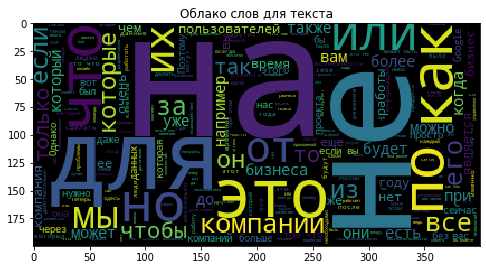

In [5]:
import matplotlib.pyplot as plt
from wordcloud import  WordCloud

plt.figure(figsize=(8,10))
wc = WordCloud(max_words=1000, random_state=1).generate(joined_text)
plt.title('Облако слов для текста')
plt.imshow(wc)
plt.show()

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('russian'))
tokens = word_tokenize(joined_text)
filtered = [t for t in tokens if not t in stop_words]
new_joined_text = ' '.join(filtered)

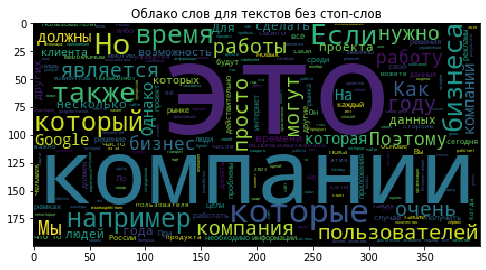

In [8]:
plt.figure(figsize=(8,10))
wc = WordCloud(max_words=1000, random_state=1).generate(new_joined_text)
plt.title('Облако слов для текстов без стоп-слов')
plt.imshow(wc)
plt.show()

In [9]:
tags = []
for t in data.loc[:, 2]:
    tags += eval(t)
joined_tags = ' '.join(tags)

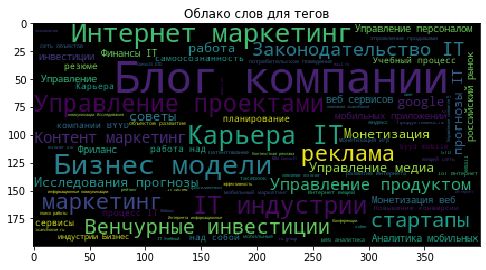

In [10]:
plt.figure(figsize=(8,10))
wc = WordCloud(max_words=1000, random_state=1).generate(joined_tags)
plt.title('Облако слов для тегов')
plt.imshow(wc)
plt.show()

In [11]:
request = texts[-1]
src = texts[:-1]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=3, max_df=1.5)
x_train = vectorizer.fit_transform(src)
request_vec = vectorizer.transform([request])
sample_count, feature_count = x_train.shape
print(f'titles_count={sample_count}, words_count={feature_count}')

titles_count=181, words_count=6092


In [13]:
import scipy as sp
def eucl(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())
def norm(v1, v2):
    normal_v1 = v1 / sp.linalg.norm(v1.toarray())
    normal_v2 = v2 / sp.linalg.norm(v2.toarray())
    delta = normal_v1 - normal_v2
    return sp.linalg.norm(delta.toarray())
def cos(v1, v2):
    return sp.spatial.distance.cosine(v1.toarray(), v2.toarray())

In [14]:
def find(dist_func):
    found = (None,) * 3
    for idx, text in enumerate(src):
        dist = dist_func(x_train.getrow(idx), request_vec)
        if not found[0] or dist < found[0]:
            found = (dist, text, idx)
    return found

In [15]:
found = find(eucl)
print(f'Best text is {found[2]} with distation = {found[0]}: {found[1]}')

Best text is 25 with distation = 10.908712114635714: В последнее время участились жалобы зарубежных клиентов на то, что они не могут оплатить услуги «Моего круга» ни одним из предлагаемых нами способов, но могут оплатить с помощью PayPal. Идём им навстречу и добавляем этот способ оплаты. Добро пожаловать за лучшими ИТ-специалистами к нам! moikrug.ru




In [16]:
found = find(norm)
print(f'Best text is {found[2]} with distation = {found[0]}: {found[1]}')

Best text is 45 with distation = 1.1771356634158567: 

Рубрика «Бизнес-персона» рассказывает читателям «Мегамозга» о том, какие истории и факты окружают наиболее ярких IT-предпринимателей со всего мира, стоимость компаний под управлением которых превышает любые разумные пределы. Мы не будем ограничиваться только «новой волной» бизнесменов и расскажем в том числе и о тех, кого принято называть «старой школой».

Сегодня крупным планом – Пекка Рантала, экс-глава компании Rovio (разработчик игры Angry Birds), человек, посвятивший 19 лет жизни работе в Nokia.

В условиях современных реалий все реже встречаются истории столь долговременных отношений между основателями компании и нанятым со стороны топ-менеджером.

Пекка Рантала родился в 1966 году и проживает в городе Эспоо (Финляндия). Рантала окончил Школу экономики в городе Хельсинки. Его карьерный рост и профессиональное развитие связано с компанией Nokia. Рантала пришел туда в возрасте 28 лет.

Alma Nokia
Финская компания Nokia основана

In [17]:
found = find(cos)
found = found if found else find(norm)
print(f'Best text is {found[2]} with distation = {found[0]}: {found[1]}')

Best text is 45 with distation = 0.6928241850427445: 

Рубрика «Бизнес-персона» рассказывает читателям «Мегамозга» о том, какие истории и факты окружают наиболее ярких IT-предпринимателей со всего мира, стоимость компаний под управлением которых превышает любые разумные пределы. Мы не будем ограничиваться только «новой волной» бизнесменов и расскажем в том числе и о тех, кого принято называть «старой школой».

Сегодня крупным планом – Пекка Рантала, экс-глава компании Rovio (разработчик игры Angry Birds), человек, посвятивший 19 лет жизни работе в Nokia.

В условиях современных реалий все реже встречаются истории столь долговременных отношений между основателями компании и нанятым со стороны топ-менеджером.

Пекка Рантала родился в 1966 году и проживает в городе Эспоо (Финляндия). Рантала окончил Школу экономики в городе Хельсинки. Его карьерный рост и профессиональное развитие связано с компанией Nokia. Рантала пришел туда в возрасте 28 лет.

Alma Nokia
Финская компания Nokia основана

In [18]:
vectorizer = CountVectorizer(min_df=4, max_df=2.0)
x_train = vectorizer.fit_transform(texts[:-1])
request_vec = vectorizer.transform([request])

In [19]:
found = find(eucl)
print(f'Best text is {found[2]} with distation = {found[0]}: {found[1]}')

Best text is 25 with distation = 10.535653752852738: В последнее время участились жалобы зарубежных клиентов на то, что они не могут оплатить услуги «Моего круга» ни одним из предлагаемых нами способов, но могут оплатить с помощью PayPal. Идём им навстречу и добавляем этот способ оплаты. Добро пожаловать за лучшими ИТ-специалистами к нам! moikrug.ru




In [20]:
found = find(norm)
print(f'Best text is {found[2]} with distation = {found[0]}: {found[1]}')

Best text is 45 with distation = 1.1657225019410096: 

Рубрика «Бизнес-персона» рассказывает читателям «Мегамозга» о том, какие истории и факты окружают наиболее ярких IT-предпринимателей со всего мира, стоимость компаний под управлением которых превышает любые разумные пределы. Мы не будем ограничиваться только «новой волной» бизнесменов и расскажем в том числе и о тех, кого принято называть «старой школой».

Сегодня крупным планом – Пекка Рантала, экс-глава компании Rovio (разработчик игры Angry Birds), человек, посвятивший 19 лет жизни работе в Nokia.

В условиях современных реалий все реже встречаются истории столь долговременных отношений между основателями компании и нанятым со стороны топ-менеджером.

Пекка Рантала родился в 1966 году и проживает в городе Эспоо (Финляндия). Рантала окончил Школу экономики в городе Хельсинки. Его карьерный рост и профессиональное развитие связано с компанией Nokia. Рантала пришел туда в возрасте 28 лет.

Alma Nokia
Финская компания Nokia основана

In [21]:
found = find(cos)
found = found if found else find(norm)
print(f'Best text is {found[2]} with distation = {found[0]}: {found[1]}')

Best text is 45 with distation = 0.6794544757658034: 

Рубрика «Бизнес-персона» рассказывает читателям «Мегамозга» о том, какие истории и факты окружают наиболее ярких IT-предпринимателей со всего мира, стоимость компаний под управлением которых превышает любые разумные пределы. Мы не будем ограничиваться только «новой волной» бизнесменов и расскажем в том числе и о тех, кого принято называть «старой школой».

Сегодня крупным планом – Пекка Рантала, экс-глава компании Rovio (разработчик игры Angry Birds), человек, посвятивший 19 лет жизни работе в Nokia.

В условиях современных реалий все реже встречаются истории столь долговременных отношений между основателями компании и нанятым со стороны топ-менеджером.

Пекка Рантала родился в 1966 году и проживает в городе Эспоо (Финляндия). Рантала окончил Школу экономики в городе Хельсинки. Его карьерный рост и профессиональное развитие связано с компанией Nokia. Рантала пришел туда в возрасте 28 лет.

Alma Nokia
Финская компания Nokia основана

In [22]:
vectorizer = CountVectorizer(min_df=1, max_df=2.0)
x_train = vectorizer.fit_transform(texts[:-1])
request_vec = vectorizer.transform([request])

In [23]:
found = find(eucl)
print(f'Best text is {found[2]} by eucl with distation = {found[0]}: {found[1]}\n')


Best text is 25 by eucl with distation = 13.076696830622021: В последнее время участились жалобы зарубежных клиентов на то, что они не могут оплатить услуги «Моего круга» ни одним из предлагаемых нами способов, но могут оплатить с помощью PayPal. Идём им навстречу и добавляем этот способ оплаты. Добро пожаловать за лучшими ИТ-специалистами к нам! moikrug.ru





In [24]:
found = find(norm)
print(f'Best text is {found[2]} with distation = {found[0]}: {found[1]}')

Best text is 45 with distation = 1.1995252780102301: 

Рубрика «Бизнес-персона» рассказывает читателям «Мегамозга» о том, какие истории и факты окружают наиболее ярких IT-предпринимателей со всего мира, стоимость компаний под управлением которых превышает любые разумные пределы. Мы не будем ограничиваться только «новой волной» бизнесменов и расскажем в том числе и о тех, кого принято называть «старой школой».

Сегодня крупным планом – Пекка Рантала, экс-глава компании Rovio (разработчик игры Angry Birds), человек, посвятивший 19 лет жизни работе в Nokia.

В условиях современных реалий все реже встречаются истории столь долговременных отношений между основателями компании и нанятым со стороны топ-менеджером.

Пекка Рантала родился в 1966 году и проживает в городе Эспоо (Финляндия). Рантала окончил Школу экономики в городе Хельсинки. Его карьерный рост и профессиональное развитие связано с компанией Nokia. Рантала пришел туда в возрасте 28 лет.

Alma Nokia
Финская компания Nokia основана

In [25]:
found = find(cos)
found = found if found else find(norm)
print(f'Best text is {found[2]} with distation = {found[0]}: {found[1]}')

Best text is 45 with distation = 0.7194304462927599: 

Рубрика «Бизнес-персона» рассказывает читателям «Мегамозга» о том, какие истории и факты окружают наиболее ярких IT-предпринимателей со всего мира, стоимость компаний под управлением которых превышает любые разумные пределы. Мы не будем ограничиваться только «новой волной» бизнесменов и расскажем в том числе и о тех, кого принято называть «старой школой».

Сегодня крупным планом – Пекка Рантала, экс-глава компании Rovio (разработчик игры Angry Birds), человек, посвятивший 19 лет жизни работе в Nokia.

В условиях современных реалий все реже встречаются истории столь долговременных отношений между основателями компании и нанятым со стороны топ-менеджером.

Пекка Рантала родился в 1966 году и проживает в городе Эспоо (Финляндия). Рантала окончил Школу экономики в городе Хельсинки. Его карьерный рост и профессиональное развитие связано с компанией Nokia. Рантала пришел туда в возрасте 28 лет.

Alma Nokia
Финская компания Nokia основана

In [26]:
request

'\n\nБуквально пару часов назад финская компания Nokia, совсем недавно заявившая об изменении вектора развития и доложившая об успехах в реализации данного направления, объявила о желании купить французскую компанию Withings — разработчика и производителя фитнес-гаджетов, по цене в $191 млн.\n\nПо предварительным планам, 200 сотрудников компании перейдут на работу в новое подразделение Nokia (которое будет называться «advanced technology division»). Очевидно, что компания этим шагом старается усилить собственные позиции в сегменте IoT и прочей носимой электроники. Напоминаем: недавно Nokia, «оставившая» собственное телефонное подразделение в Microsoft после поглощения, планирует завершить откуп Alcatel-Lucent за астрономическую сумму в €15,6 миллиардов.\n\nТакже Nokia продала собственный картографический сервис HERE конгломерату автопроизводителей по цене в $3 млрд. По словам нового CEO Nokia, Раджив Сури, компания не торопится в деле возврата себе имени и восстановления бренда.'